In [69]:
from scipy.io import wavfile
from scipy.fft import fft, fftfreq, fftshift
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt
from adjustText import adjust_text
from spectrum import *
import scipy

In [70]:
from nt_toolbox.general import *
from nt_toolbox.signal import *
import cv2
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


/Users/salmakertit/opt/anaconda3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['xcorr', 'log10', 'fftshift', 'resize', 'pylab', 'cast', 'ma', 'linalg', 'fft', 'cholesky', 'psd', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [152]:
# Reading noise and music files and 
fs, noise1 = wavfile.read("noise1.wav")
noise1=noise1.astype(np.float)
fs1, music = wavfile.read("music.wav")
music=music.astype(np.float)
fs, noise2 = wavfile.read("noise2.wav")
nois2e=noise2.astype(np.float)
fs, noise3 = wavfile.read("noise3.wav")
noise=noise3.astype(np.float)

In [154]:
# Simulating noisy version of the music using the three noises using a global
# factor of 0.1 for each noise
sigma = .1;
music1 = music + 0.1*noise1;
music2 = music + 0.1*noise2;
music3 = music + 0.1*noise3;

<Figure size 432x288 with 0 Axes>

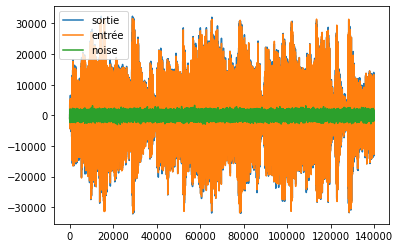

In [157]:
plt.figure()
plt.figure()
plt.plot(music1,label='Noisy music')
plt.plot(music,label='Clean music')
plt.plot(0.1*noise1,label='noise')
plt.legend();

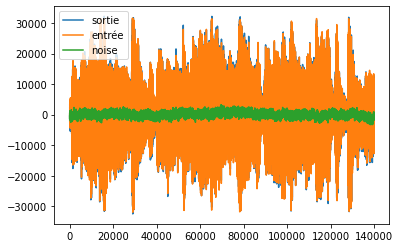

In [160]:
plt.figure()
plt.plot(music2,label='Noisy music')
plt.plot(music,label='Clean music')
plt.plot(0.1*noise2,label='noise')
plt.legend();

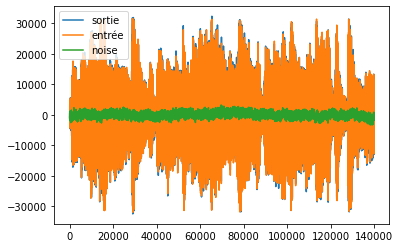

In [161]:
plt.figure()
plt.plot(music3,label='Noisy music')
plt.plot(music,label='Clean music')
plt.plot(0.1*noise2,label='Noise')
plt.legend();

In [162]:
n = 1024;
N = n**2
# Denoising the sound using the Oracle Wiener filter.

In [137]:
# Estimating P the power-spectrum
P = 1/N * abs(fft(music)**2)

In [138]:
# Computing the approximate Wiener filter
h_w = real(ifft(P / (P + sigma**2)))

In [171]:
u = fftshift(h_w)

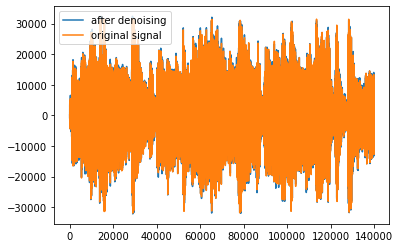

In [167]:
# Displaying the denoising result - with noise 1
plt.figure()
plt.plot(cconv(music1,u, n),label='after denoising')
plt.plot(music,label='original signal')
plt.legend();

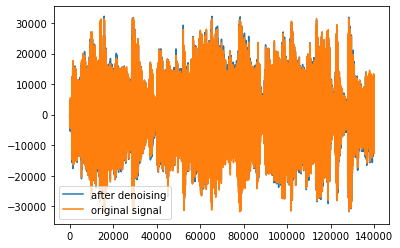

In [168]:
# Displaying the denoising result - with noise 2
plt.figure()
plt.plot(cconv(music2,u, n),label='after denoising')
plt.plot(music,label='original signal')
plt.legend();

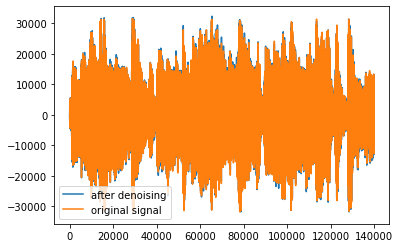

In [169]:
# Displaying the denoising result - with noise 3
plt.figure()
plt.plot(cconv(music3,u, n),label='after denoising')
plt.plot(music,label='original signal')
plt.legend();

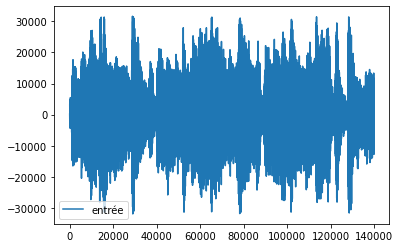

In [170]:
# Displaying the original  signal
plt.figure()
plt.plot(music,label='Original music')
plt.legend();